In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [3]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network
#Softmax Function is to test the reliability of the model using as Loss Function the Cross Entropy Function, in order to maximize the performance of our neural network.
#Adam optimizer typically requires a smaller learning rate: start at 0.001, then increase/decrease as you see fit.

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
epochs = 100
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/100
981/981 [==============================] - 47s 47ms/step - loss: 2.0677 - accuracy: 0.5173 - val_loss: 0.3775 - val_accuracy: 0.9005
Epoch 2/100
981/981 [==============================] - 47s 48ms/step - loss: 0.4813 - accuracy: 0.8672 - val_loss: 0.1203 - val_accuracy: 0.9717
Epoch 3/100
981/981 [==============================] - 46s 47ms/step - loss: 0.3225 - accuracy: 0.9134 - val_loss: 0.1111 - val_accuracy: 0.9725
Epoch 4/100
981/981 [==============================] - 49s 50ms/step - loss: 0.2600 - accuracy: 0.9309 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 5/100
981/981 [==============================] - 49s 50ms/step - loss: 0.2356 - accuracy: 0.9377 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 6/100
981/981 [==============================] - 45s 46ms/step - loss: 0.2185 - accuracy: 0.9447 - val_loss: 0.0645 - val_accuracy: 0.9847
Epoch 7/100
981/981 [==============================] - 47s 48ms/step - loss: 0.2176 - accuracy: 0.9465 - val_loss: 0.0613 - val_ac

981/981 [==============================] - 46s 47ms/step - loss: 0.3015 - accuracy: 0.9519 - val_loss: 0.0844 - val_accuracy: 0.9814
Epoch 58/100
981/981 [==============================] - 44s 45ms/step - loss: 0.3114 - accuracy: 0.9505 - val_loss: 0.0585 - val_accuracy: 0.9894
Epoch 59/100
981/981 [==============================] - 43s 44ms/step - loss: 0.3424 - accuracy: 0.9451 - val_loss: 0.0707 - val_accuracy: 0.9825
Epoch 60/100
981/981 [==============================] - 45s 46ms/step - loss: 0.2646 - accuracy: 0.9556 - val_loss: 0.0644 - val_accuracy: 0.9883
Epoch 61/100
981/981 [==============================] - 46s 47ms/step - loss: 0.2962 - accuracy: 0.9485 - val_loss: 1.0051 - val_accuracy: 0.8067
Epoch 62/100
981/981 [==============================] - 42s 43ms/step - loss: 0.3907 - accuracy: 0.9372 - val_loss: 0.0693 - val_accuracy: 0.9852
Epoch 63/100
981/981 [==============================] - 46s 47ms/step - loss: 0.2945 - accuracy: 0.9500 - val_loss: 0.0805 - val_accuracy

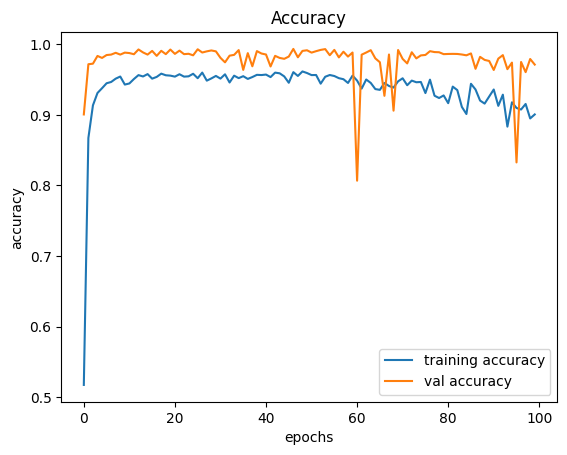

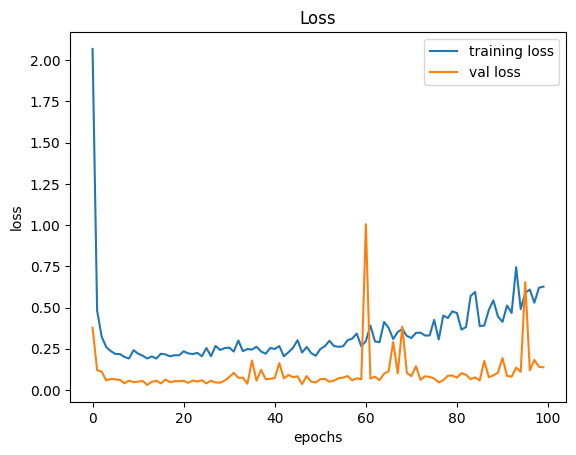

In [6]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]                                                      

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred =[np.argmax(i) for i in model.predict(X_test)] 

print(len(pred))
print(len(labels))

#Accuracy with the test data
print(accuracy_score(labels, pred))

395/395 [==============================] - 5s 11ms/step
12630
12630
0.9292161520190024
